# GEOL 898 Student Presentation  
**Basalt magma sources during the opening of the North Atlantic**  
S. R. Carter, N. M. Evensen, P. J. Hamilton, R. K. O'Nions  

Drew Heasman  
April 1, 2021

I had originally intended to do 4 papers and compare the results based on their dates. I revised this plan when I lost half my workforce!  I also revised when I realized how deep I could go into just one paper. I found this paper quite interesting, and also had to grab some data from previous publications that this paper used in its comparisons.  

In [26]:
import pandas as pd
import geochron_apps as gc
from bokeh.plotting import output_notebook, figure, show
from bokeh.models import Slope, Label
from bokeh.transform import factor_cmap
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

output_notebook()

Loading BokehJS ...

The first thing we're going to do is import all the libraries I'll be using in this presentation.

<center><img src="images/oh_lord.jpg" align="center">
<h3>If I pronounce any of these names right it will be a miracle...</h3></center>

Most of the names in the presentation seem to have Viking origins... don't be too surprised if I refer to things as East Greenland and West Greenland from here on out!

## Geology of the area and the study

* Purpose: Attempt to find evidence about the composition of magma sources during the opening of the North Atlantic, and consequently sub-continental upper mantle. 
* Conculsion of Study: No evidence to show undepleted mantle source regions beneath the continent at this time.
* Location of study(Greenland, Baffin, Scotland)

The paper I chose to review was attempting to determine sub continental upper mantle isotopic composition. More specifically it was sampling North Atlantic Tertiary basalts at the time of continental break up. The samples were primarily basalts from Greenland, Baffin Island, and for comparison purposes Scotland.  

They determined that the Greenland and Baffin Island basalts showed evidence of depleted mantle sources. Or more appropriately stated, there was no evidence of undepleted source regions beneath the continent at 60 Ma.
* Assumptions:
* The geology of the area is correct.  

* Estimate of isotopic sub-oceanic upper mantle indicates
  * Rb is depleted in relation to Sr
  * Nd is depleted in relation to Sm

The mid-ocean ridge has the largest proportion of terrestrial volcanics, and provides an estimate of isotopic composition of sub-oceanic upper mantle. Sr isotopic compositions of MORB indicate relative depletion in Rb, and Nd, in comparison to Sr, and Sm. But what about sub-continental upper mantle?

* But what about sub-continental upper mantle?

* Thermal and seismic suggest depleted sub-continental upper mantle.
  * These models assume subcontinental upper mantle depleted in basaltic components (lower Fe/Mg, and also lower Rb/Sr and higher Sm/Nd ratios)
  * Many continental basalts don't show the lower Rb/Sr and higher Sm/Nd ratios expected
  * Is this proof of existence of ancient source regions beneath the continents that have time integrated Rb/Sr ratios greater than that of bulk Earth???

Referenced studies imply that the sub-continental upper mantle is depleted.  These studies use thermal and seismic data to make this inference and assume lower Fe/Mg, low Rb/Sr, and high Sm/Nd ratios.  However frequently the low Rb/Sr and high Sm/Nd aren't observed in continental basalts.
Perhaps <sup>87</sup>Sr/<sup>86</sup>Sr isotopic ratios taken from continental basalts (higher than present day bulk Earth) infer existence of ancient source regions beneath the continents that have time integrated Rb/Sr ratios greater than that of bulk Earth???

* Difficulties in determining the sub-continental upper mantle composition from continental basalts.
  * Sample is a small proportion of the mantle and at unknown depths
  * Possible contamination by continental basement
  * If heterogenous, then melting events could favour less depleted areas.

Issues that arise when sampling these basalts include, unknown depth of mantle origin and a small proportion of that mantle is extracted.  There is also a possibility of contamination by the continental basement.  Also, if the subcontinental upper mantle is heterogeneous in composition within strongly depleted and less depleted zones, there could be preferential melting of the less depleted areas, and result in some survivorship bias. 

* Study sampled 50 - 70 Ma flood basalts during rifting of the North Atlantic.
  * Samples are located in Western and Eastern Greenland, as well as Baffin Island
  * North-west Scotland samples from a previous study were included
  * Plateau lavas at Faeroes Islands, and east Greenland, and on either side of Davis Strait in west Greenland and Baffin 

This study sampled 50-70 Ma flood basalts during the rifting of the North Atlantic.  The samples are located in Western and Eastern Greenland, as well as Baffin Island.  All these samples erupted through continental crust with some ambiguity mentioned with the Faeroes Island samples. Plateau lavas at Faeroe Islands, and east Greenland, and on either side of Davis Strait in west Greenland and Baffin Island erupted in the same period.

North-west Scotland samples from a previous study were included.

North Atlantic Tertiary volcanic province is ~ 2000 km of lavas (mostly alkali olivine basalts, tholeiites, hawaiites, mugearites, and trachytes. Central intrusive complexes seen throughout the entire region, but mainly in North-west Scotland and may include (peridotites, gabbros, and granites).

Island erupted in the same period.
  * All samples erupted through continental crust (some ambiguity Faeroes Island samples)
  * North Atlantic Tertiary volcanic province is ~2000 km of lavas
    * Alkali olivine basalts, tholeiites, hawaiites, mugearites, and trachytes.
  * North-west Scotland includes
    * Peridotites, gabbros, and granites

This study sampled 50-70 Ma flood basalts during the rifting of the North Atlantic.  The samples are located in Western and Eastern Greenland, as well as Baffin Island.  All these samples erupted through continental crust with some ambiguity mentioned with the Faeroes Island samples. Plateau lavas at Faeroe Islands, and east Greenland, and on either side of Davis Strait in west Greenland and Baffin Island erupted in the same period.

North-west Scotland samples from a previous study were included.

North Atlantic Tertiary volcanic province is ~ 2000 km of lavas (mostly alkali olivine basalts, tholeiites, hawaiites, mugearites, and trachytes. Central intrusive complexes seen throughout the entire region, but mainly in North-west Scotland and may include (peridotites, gabbros, and granites).

<center><img src="images/carter_fig_1.png" align="center"></center>

Here is a figure showing the study area reconstructed at 60 Ma

In [27]:
t1 = 60 

decay_const_Rb1977 = 1.42*10**-11 # Steiger and Jager (1977)
decay_const_Rb2015 = 1.397*10**-11 # Villa et al (2015)
#decay_const_Sm1978 = 6.54*10**−12 # Lugmair and Marti (1978)    - A highlight of the copy-paste problem!
decay_const_Sm1978 = 6.54*10**-12 # Lugmair and Marti (1978)

Nd_CHUR_1977 = 0.51263  # O'Nions et al (1977)
Sr_CHUR_1977 = 0.705 # O'Nions et al (1977)

Sr86_aw = 85.9092624 # Eglington Spreadsheet
Rb87_aw = 86.90918 # Eglington Spreadsheet
Sm147_aw = 146.914893  # Eglington Spreadsheet
Nd144_aw = 143.910083 # Eglington Spreadsheet


First we're going to define some of the constants that will be used in this notebook.  The decay constant for Rb in 1979 likely being used was Steiger and Jager (1977), however this study doesn't mention this explicitly. I also used a decay constant for Rb in 2015 for some recalculations.

The decay constant of Sm has apparently been more consistent, as I've really only found the one in 1978 by Lugmair and Marti. You can also see here a problem with copy-pasting.  The negative sign which I copied directly from the publication is not actually a negative sign. This isn't a problem with one value... but if we were to copy an entire table, or use optical character recognition techniques...

Nd and Sr CHUR ratios are obtained from O'Nions et al (1977). These were the referenced values in this paper.

Finally all atomic weights were obtained from Bruce's excel file.

## Data review methodology of Nd- and Sr- isotopes

The method of checking todays values versus the values in this 1979 paper is as follows:
* Calculate the sample (t<sub>2</sub>) ratios from the computed initial ratios in Table 1 from the paper using the 1977 decay constants.
* Recalculate the parent ratios based on current weights and abundances of isotopes.
* Recalculate the initial ratios based on the measured initial ratios, the recalculated parent ratios, the updated decay constants(in the case of Rb), and 60 Ma age.
* Evaluate the differences.

So one of the first problems I encountered with this paper is that the initial daughter ratios given in the table was calculated to 60 Ma. The measured isotopic values at present day weren't included with the data.  So to compare what these values would be using todays constants, I first back-calculated the computed initial ratios, using a 1977 constant which was likely used at this time. I also recalculated the parent ratios, using the current atomic weights.  

Now with modern present day parent ratios, and the original sampled daughter ratios, I can recalculate the 60 Ma initial daughter isotopic ratios and compare them with the originally calculated values.

In [28]:
carter_df = pd.read_csv("data/Carter_et_al.csv")
carter_df.head()

,Sample,Region,Location,Rb,Rb/Sr,Sr,87Sr/86Sr,SrError,Sm,Sm/Nd,Nd,143Nd/144Nd,NdError
0,Fo07,Faeroes,Torshavn,1.19,0.004,282,0.70324,0.00003,2.66,0.339,7.84,0.51280,0.00002
1,Fo19,Faeroes,Torshavn,9.02,0.070,123,0.70357,0.00005,5.54,0.263,21.10,0.51287,0.00003
2,Fo23,Faeroes,Torshavn,2.53,0.009,270,0.70325,0.00004,6.20,0.271,22.90,0.51293,0.00002
3,Fo34,Faeroes,Suduroy,11.10,0.041,274,0.70348,0.00005,7.04,0.255,27.60,0.51292,0.00002
4,Fo41,Faeroes,Suduroy,1.87,0.005,388,0.70340,0.00004,3.99,0.279,14.30,0.51286,0.00003


First we read the data in through a prepared CSV file

### **Step 1:**  Ratios here are computed ratios with an age of 60 Ma. Because of this, I needed to "back calculate" the sample daughter isotopic ratios.  

In [29]:
carter_df['calc_t2_87Sr/86Sr'] = carter_df.apply(lambda row: round(gc.calc_t2_daughter(row['87Sr/86Sr'],
                                                                                 row['Rb/Sr'],
                                                                                 decay_const_Rb1977
                                                                                 , t1),5),axis=1)
carter_df[['Sample','87Sr/86Sr','Rb/Sr','calc_t2_87Sr/86Sr']].head()

,Sample,87Sr/86Sr,Rb/Sr,calc_t2_87Sr/86Sr
0,Fo07,0.70324,0.004,0.70324
1,Fo19,0.70357,0.070,0.70363
2,Fo23,0.70325,0.009,0.70326
3,Fo34,0.70348,0.041,0.70351
4,Fo41,0.70340,0.005,0.70340


This section of code calculated the present day (or t2) daughter isotopic ratio. I retrospect with all the calculations and recalculations, naming this column with 0 Ma, instead of t2, would make things more clear. I realized it gets difficult to keep track of these numbers with multiple calculations.  I could have just changed it, but I wanted to document the experience so... advice for next time!

In [30]:
carter_df['calc_t2_143Nd/144Nd'] = carter_df.apply(lambda row: round(gc.calc_t2_daughter(row['143Nd/144Nd'],
                                                                                 row['Sm/Nd'],
                                                                                 decay_const_Sm1978
                                                                                 , t1),5),axis=1)
carter_df[['Sample','143Nd/144Nd','Sm/Nd','calc_t2_143Nd/144Nd']].head()

,Sample,143Nd/144Nd,Sm/Nd,calc_t2_143Nd/144Nd
0,Fo07,0.51280,0.339,0.51293
1,Fo19,0.51287,0.263,0.51297
2,Fo23,0.51293,0.271,0.51304
3,Fo34,0.51292,0.255,0.51302
4,Fo41,0.51286,0.279,0.51297


I then repeated these calculations with Sm and Nd.

### **Step 2:**  Recalculated the sample parent ratios based on current atomic weights and abundances from the IUPAC website.

In [31]:
carter_df['calc_86Sr'] = carter_df['Sr'] / (10.5466 + carter_df['calc_t2_87Sr/86Sr'] * 1.011636) # Numbers from Eglington spreadsheet
carter_df['calc_87Rb'] = carter_df['Rb'] / 85.46776 # Numbers from Eglington spreadsheet
carter_df['calc_Rb/Sr'] = round((carter_df['calc_87Rb'] / carter_df['calc_86Sr'])*(Sr86_aw/Rb87_aw), 3)
carter_df['diff_Rb/Sr'] = abs(round(carter_df['Rb/Sr'] - carter_df['calc_Rb/Sr'], 3))
carter_df[['Sample','Rb/Sr','calc_86Sr', 'calc_Rb/Sr','diff_Rb/Sr']].head()

,Sample,Rb/Sr,calc_86Sr,calc_Rb/Sr,diff_Rb/Sr
0,Fo07,0.004,25.048803,0.001,0.003
1,Fo19,0.070,10.925159,0.010,0.060
2,Fo23,0.009,23.982854,0.001,0.008
3,Fo34,0.041,24.337608,0.005,0.036
4,Fo41,0.005,34.463815,0.001,0.004


I recalculated the Rb/Sr ratios using today's atomic weights, and also calculated the difference between the calculated values and the original values. These values don't show much of a change.

In [32]:
carter_df['calc_147Sm'] = carter_df['Sm'] / 6.825219 # Numbers from Eglington spreadsheet
carter_df['calc_144Nd'] = carter_df['Nd'] / (3.703328 + carter_df['calc_t2_87Sr/86Sr'] * 0.9930493) # Numbers from Eglington spreadsheet
carter_df['calc_Sm/Nd'] = round((carter_df['calc_147Sm'] / carter_df['calc_144Nd'])*(Nd144_aw/Sm147_aw), 3)
carter_df['diff_Sm/Nd'] = abs(round(carter_df['Sm/Nd'] - carter_df['calc_Sm/Nd'], 3))
carter_df[['Sample','Sm/Nd','calc_Sm/Nd','diff_Sm/Nd']].head()

,Sample,Sm/Nd,calc_Sm/Nd,diff_Sm/Nd
0,Fo07,0.339,0.214,0.125
1,Fo19,0.263,0.166,0.097
2,Fo23,0.271,0.171,0.100
3,Fo34,0.255,0.161,0.094
4,Fo41,0.279,0.176,0.103


I repeated the calculations here with Sm and Nd, and there is more of a deviation here from the original calculated values. This is likely because Sm and Nd atomic weights and isotopic abundances have evolved more since 1979 than Rb and Sr.  This is likely going to effect future calculations.

###### **Step 3:**  Recalculate the 60 Ma initial ratios based on the measured initial ratios, the recalculated parent ratios, the updated decay constants(in the case of Rb), and 60 Ma age.

In [33]:
carter_df['recalc_87Sr/86Sr'] = carter_df.apply(lambda row: round(gc.calc_initial(row['calc_t2_87Sr/86Sr'],
                                                                                 row['calc_Rb/Sr'],
                                                                                 decay_const_Rb2015, 
                                                                                 t1),5),axis=1)
carter_df['diff_87Sr/86Sr'] = abs(round(carter_df['87Sr/86Sr'] - carter_df['recalc_87Sr/86Sr'], 5))
carter_df[['Sample','calc_t2_87Sr/86Sr', 'calc_Rb/Sr','recalc_87Sr/86Sr','87Sr/86Sr', 'diff_87Sr/86Sr']].head()

,Sample,calc_t2_87Sr/86Sr,calc_Rb/Sr,recalc_87Sr/86Sr,87Sr/86Sr,diff_87Sr/86Sr
0,Fo07,0.70324,0.001,0.70324,0.70324,0.00000
1,Fo19,0.70363,0.010,0.70362,0.70357,0.00005
2,Fo23,0.70326,0.001,0.70326,0.70325,0.00001
3,Fo34,0.70351,0.005,0.70351,0.70348,0.00003
4,Fo41,0.70340,0.001,0.70340,0.70340,0.00000


Finally I recalculated for 60 Ma.  For the recalculated 87Sr/86Sr there is very little to no difference in initial daughter ratios.

In [34]:
carter_df['recalc_143Nd/144Nd'] = carter_df.apply(lambda row: round(gc.calc_t2_daughter(row['calc_t2_143Nd/144Nd'],
                                                                                 row['calc_Sm/Nd'],
                                                                                 decay_const_Sm1978
                                                                                 , t1),5),axis=1)
carter_df['diff_143Nd/144Nd'] = abs(round(carter_df['143Nd/144Nd'] - carter_df['recalc_143Nd/144Nd'], 5))
carter_df[['Sample', 'calc_t2_143Nd/144Nd', 'calc_Sm/Nd', 'recalc_143Nd/144Nd', '143Nd/144Nd', 'diff_143Nd/144Nd']].head()

,Sample,calc_t2_143Nd/144Nd,calc_Sm/Nd,recalc_143Nd/144Nd,143Nd/144Nd,diff_143Nd/144Nd
0,Fo07,0.51293,0.214,0.51301,0.51280,0.00021
1,Fo19,0.51297,0.166,0.51304,0.51287,0.00017
2,Fo23,0.51304,0.171,0.51311,0.51293,0.00018
3,Fo34,0.51302,0.161,0.51308,0.51292,0.00016
4,Fo41,0.51297,0.176,0.51304,0.51286,0.00018


Doing the same with Sm and Nd, we can see there is some variation here at the ten thousand decimal place.

### Step 4: Comparisons in figures and statistics

<center><img src="images/carter_fig_2.png" align="center"></center>

This is the original figure from the paper. The plot shows a comparison of 143Nd/144Nd and 87Sr/86Sr ratios at 60 Ma (their time of eruption). 

In [35]:
faeroes_df = carter_df[carter_df['Region'] == "Faeroes"]
eg_df = carter_df[carter_df['Region'] == "East Greenland"]
wg_df = carter_df[carter_df['Region'] == "Baffin and Svartenhuk"]

This figure has different symbols for each region, so I'm going to first separate these out in my dataframe so I can plot them separately.

In [36]:
xmin, xmax = 0.702, 0.706
ymin, ymax = 0.5120, 0.5134

figure1 = gc.get_figure("Comparison of 143Nd/144Nd and 87Sr/86Sr Tertiary Lavas",
                        "87Sr/86Sr",
                        "143Nd/144Nd",
                        [xmin,xmax],
                        [ymin,ymax])
index_cmap = factor_cmap('Region', palette=['red', 'blue', 'green'], 
                         factors=sorted(carter_df.Region.unique()))

figure1.line([xmin,0.7055],[0.5130,0.5124],
            line_dash="4 4",
            line_width=1,
            color="black")
figure1.line([xmin,0.7055],[0.5132,0.5126],
            line_dash="4 4",
            line_width=1,
            color="black")

figure1.line([xmin,xmax],[Nd_CHUR_1977,Nd_CHUR_1977],
            line_width=1,
            color="black")

figure1.line([Sr_CHUR_1977,Sr_CHUR_1977],[ymin,ymax],
            line_width=1,
            color="black")

figure1.scatter('87Sr/86Sr','143Nd/144Nd',
                source=wg_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="square_cross",
                legend_label='West Greenland')
figure1.scatter('87Sr/86Sr','143Nd/144Nd',
                source=eg_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker='circle_cross',
                legend_label='East Greenland')
figure1.scatter('87Sr/86Sr','143Nd/144Nd',
                source=faeroes_df,
                fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="diamond_cross",
                legend_label='Faeroes')

figure1.scatter('recalc_87Sr/86Sr','recalc_143Nd/144Nd',
                source=wg_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="square",
                legend_label='Recalculated West Greenland')
figure1.scatter('recalc_87Sr/86Sr','recalc_143Nd/144Nd',
                source=eg_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="circle",
                legend_label='Recalculated East Greenland')
figure1.scatter('recalc_87Sr/86Sr','recalc_143Nd/144Nd',
                source=faeroes_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="diamond",
                legend_label='Recalculated Faeros')

figure1.legend.click_policy="hide"

In [37]:
show(figure1)

We can see from this plot, that the recalculated values have slightly elevated 143Nd/144Nd values, but the 87Sr/86Sr values remain the same.  However, everything considered the trend remains the same.  

Statement from paper: ... exhibit a strong negative correlation in Western Greenland, but poor in East Greenland and Faeroes. **But all considered together there is a good correlation between the two variables**, and the range of isotope compositions is similar to that for more recent volcanics in parts of the North Atlantic Ocean basin... 

I wanted to analyze this statement in the paper. After plotting the previous data, I felt this correlation should be recalculated. 

In [38]:
wg_corr1, _ = pearsonr(wg_df['recalc_143Nd/144Nd'], wg_df['recalc_87Sr/86Sr'])
wg_corr2, _ = pearsonr(wg_df['143Nd/144Nd'], wg_df['87Sr/86Sr'])
print("Recalculted correlation: ", wg_corr1)
print("Original correlation: ", wg_corr2)

Recalculted correlation:  -0.924150414468692
Original correlation:  -0.9380927157592905


I calculated the Pearson R correlation coefficient on the Western Greenland dataset first. Which was stated to have the strong correlation The negative correlation stated in the paper has not changed much.

In [39]:
eg_corr1, _ = pearsonr(eg_df['recalc_143Nd/144Nd'], eg_df['recalc_87Sr/86Sr'])
eg_corr2, _ = pearsonr(eg_df['143Nd/144Nd'], eg_df['87Sr/86Sr'])
print("Recalculted correlation: ", eg_corr1)
print("Original correlation: ", eg_corr2)

Recalculted correlation:  -0.01957783024326465
Original correlation:  -0.0013143634712180774


There is no correlation observed between 143Nd/144Nd and 87Sr/86Sr ratios for East Greenland in either dataset.

In [40]:
faeroes_corr1, _ = pearsonr(faeroes_df['recalc_143Nd/144Nd'], faeroes_df['recalc_87Sr/86Sr'])
faeroes_corr2, _ = pearsonr(faeroes_df['143Nd/144Nd'], faeroes_df['87Sr/86Sr'])
print("Recalculted correlation: ", faeroes_corr1)
print("Original correlation: ", faeroes_corr2)

Recalculted correlation:  -0.04003350037114031
Original correlation:  0.12296226220426337


Again, although slightly more, there is no correlation observed between 143Nd/144Nd and 87Sr/86Sr ratios for Faeroes in either dataset. Although take note, that the recalculated values show more of a negative correlation than original values.

In [41]:
carter_corr1, _ = pearsonr(carter_df['recalc_143Nd/144Nd'], carter_df['recalc_87Sr/86Sr'])
carter_corr2, _ = pearsonr(carter_df['143Nd/144Nd'], carter_df['87Sr/86Sr'])
print("Recalculted correlation: ", carter_corr1)
print("Original correlation: ", carter_corr2)

Recalculted correlation:  -0.5503523797503204
Original correlation:  -0.5719353703020036


Over the entire dataset, the correlation hasn't change appreciatively. 
Is this heavy handed?  Clearly there is a strong negative correlation in West Greenland. Is there a third variable in this case effecting West Greenland? What could that be?

To be thorough, I plotted some heatmaps and correlation matrices. However, a strong caveat to include with this diagrams.  "Go looking for correlations, and you will find them, even if they are meaningless". It's generally best to start with an idea and then look for those correlations.  But let's throw caution to the wind and see what we get!

In [42]:
new_data_columns = ['calc_Rb/Sr','recalc_87Sr/86Sr','calc_Sm/Nd','recalc_143Nd/144Nd']
old_data_columns = ['Rb/Sr','87Sr/86Sr','Sm/Nd','143Nd/144Nd']

This code is here to simplify future sections of code.  

[Text(0, 0.5, 'Rb/Sr'),
 Text(0, 1.5, '87Sr/86Sr'),
 Text(0, 2.5, 'Sm/Nd'),
 Text(0, 3.5, '143Nd/144Nd')]

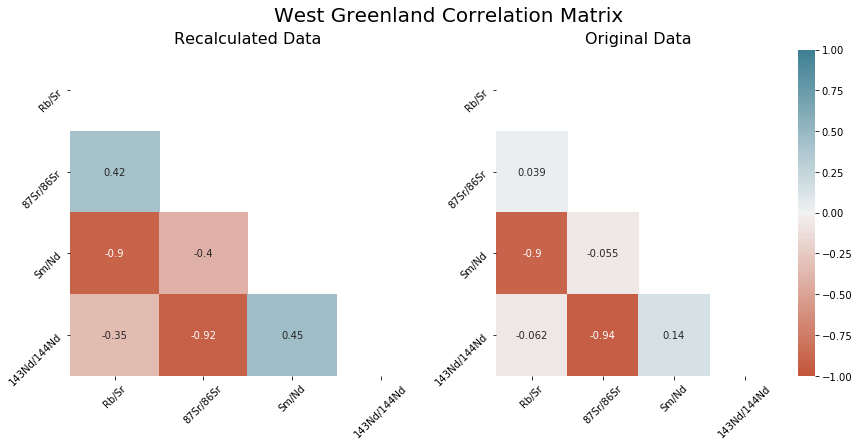

In [43]:
figure2 = plt.figure(figsize=(14,6))
ax1 = figure2.add_subplot(121)
ax2 = figure2.add_subplot(122)
labels = ['Rb/Sr','87Sr/86Sr','Sm/Nd','143Nd/144Nd']
figure2.suptitle("West Greenland Correlation Matrix", fontsize=20)

corrMatrix_wg1 = wg_df[new_data_columns].corr()
corrMatrix_wg2 = wg_df[old_data_columns].corr()
mask = np.triu(np.ones_like(corrMatrix_wg1, dtype=bool))

ax1.set_title("Recalculated Data", fontsize=16)
sns.heatmap(corrMatrix_wg1,
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True,
            cbar=False,
            ax=ax1)
ax1.set_xticklabels(labels, Rotation= 45)
ax1.set_yticklabels(labels, Rotation= 45)
ax2.set_title("Original Data", size=16)
sns.heatmap(corrMatrix_wg2,
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True,
            ax=ax2)
ax2.set_xticklabels(labels, Rotation= 45)
ax2.set_yticklabels(labels, Rotation= 45)

[Text(0, 0.5, 'Rb/Sr'),
 Text(0, 1.5, '87Sr/86Sr'),
 Text(0, 2.5, 'Sm/Nd'),
 Text(0, 3.5, '143Nd/144Nd')]

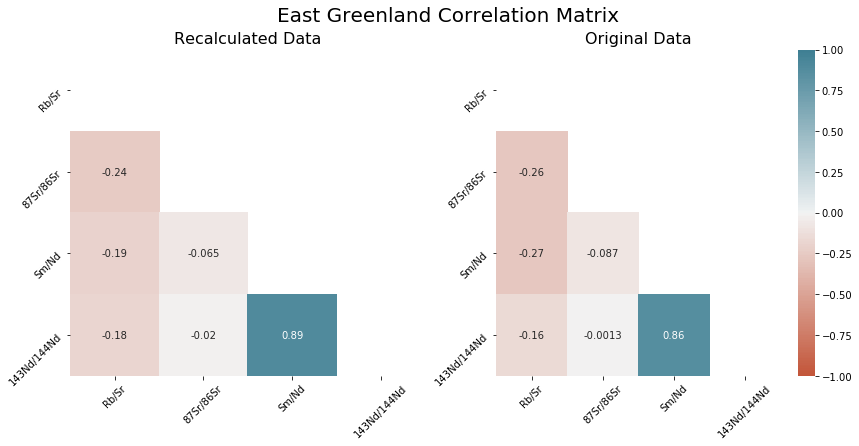

In [44]:
figure3 = plt.figure(figsize=(14,6))
ax1 = figure3.add_subplot(121)
ax2 = figure3.add_subplot(122)
labels = ['Rb/Sr','87Sr/86Sr','Sm/Nd','143Nd/144Nd']
figure3.suptitle("East Greenland Correlation Matrix", fontsize=20)

corrMatrix_eg1 = eg_df[new_data_columns].corr()
corrMatrix_eg2 = eg_df[old_data_columns].corr()
mask = np.triu(np.ones_like(corrMatrix_eg1, dtype=bool))

ax1.set_title("Recalculated Data", fontsize=16)
sns.heatmap(corrMatrix_eg1,
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True,
            cbar=False,
            ax=ax1)
ax1.set_xticklabels(labels, Rotation= 45)
ax1.set_yticklabels(labels, Rotation= 45)
ax2.set_title("Original Data", size=16)
sns.heatmap(corrMatrix_eg2,
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True,
            ax=ax2)
ax2.set_xticklabels(labels, Rotation= 45)
ax2.set_yticklabels(labels, Rotation= 45)

[Text(0, 0.5, 'Rb/Sr'),
 Text(0, 1.5, '87Sr/86Sr'),
 Text(0, 2.5, 'Sm/Nd'),
 Text(0, 3.5, '143Nd/144Nd')]

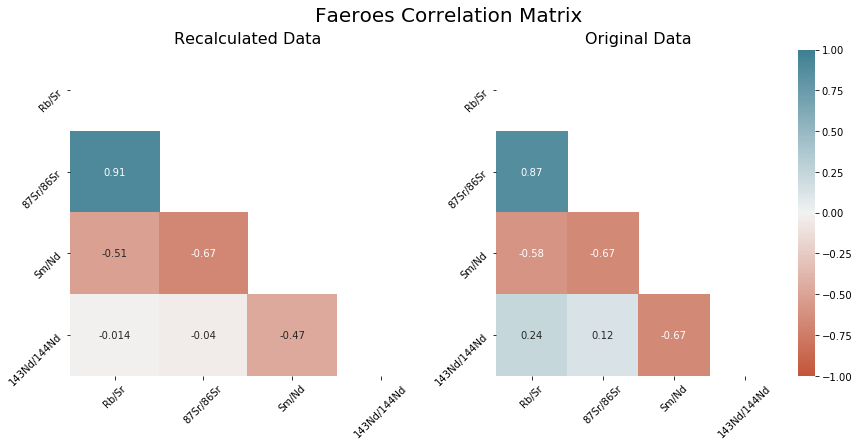

In [45]:
figure4 = plt.figure(figsize=(14,6))
ax1 = figure4.add_subplot(121)
ax2 = figure4.add_subplot(122)
labels = ['Rb/Sr','87Sr/86Sr','Sm/Nd','143Nd/144Nd']
figure4.suptitle("Faeroes Correlation Matrix", fontsize=20)

corrMatrix_f1 = faeroes_df[new_data_columns].corr()
corrMatrix_f2 = faeroes_df[old_data_columns].corr()
mask = np.triu(np.ones_like(corrMatrix_f1, dtype=bool))

ax1.set_title("Recalculated Data", fontsize=16)
sns.heatmap(corrMatrix_f1,
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True,
            cbar=False,
            ax=ax1)
ax1.set_xticklabels(labels, Rotation= 45)
ax1.set_yticklabels(labels, Rotation= 45)
ax2.set_title("Original Data", size=16)
sns.heatmap(corrMatrix_f2,
            vmin=-1,
            vmax=1,
            mask=mask,
            cmap=sns.diverging_palette(20, 220, n=200),
            annot=True,
            ax=ax2)
ax2.set_xticklabels(labels, Rotation= 45)
ax2.set_yticklabels(labels, Rotation= 45)

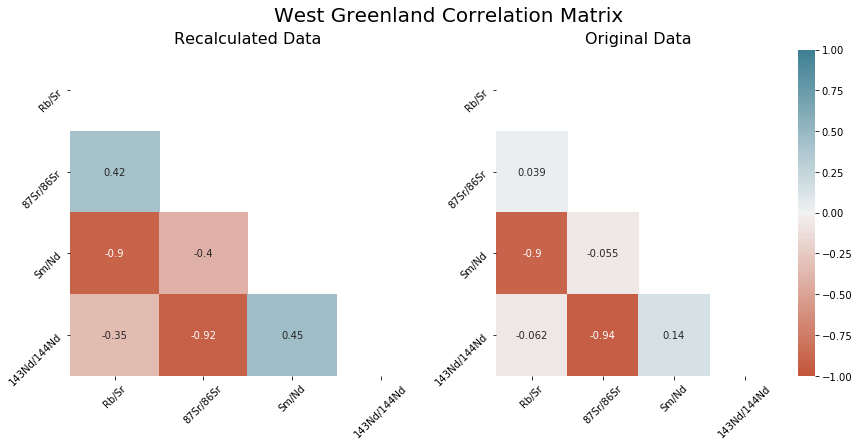

In [46]:
figure2

In West Greenland we see a strong negative correlation between Rb/Sr and 143Nd/144Nd and 87Sr/86Sr, and a moderately positive correlation in the recalculated 143Nd/144Nd and Sm/Nd.

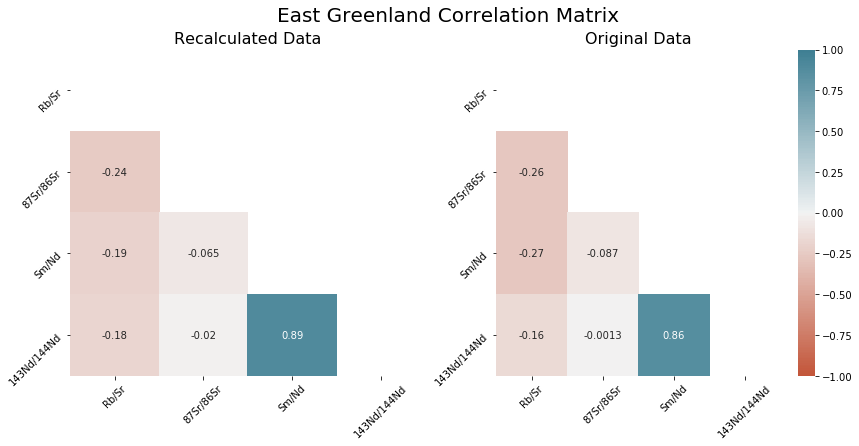

In [47]:
figure3

In East Greenland we see very little correlation in almost anything (with the exception of Rb/Sr and all values being very weakly negatively correlated), and more clearly a strongly positive correlation in the 143Nd/144Nd and Sm/Nd.

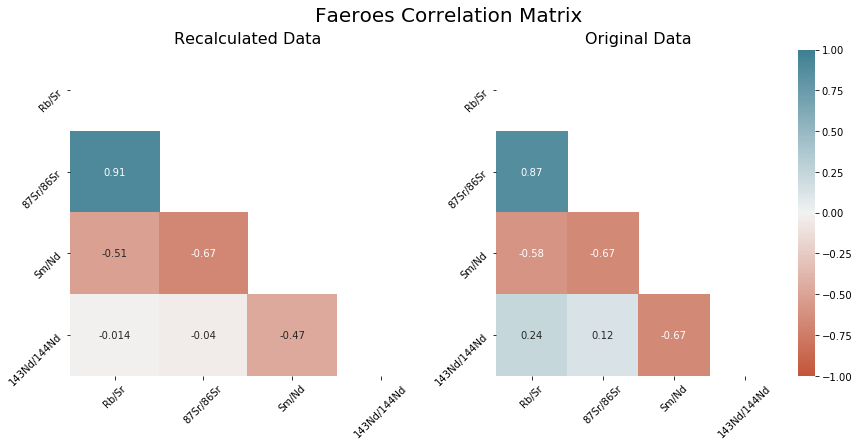

In [48]:
figure4

Finally in Faeroes we see a strongly positive correlation in the 87Sr/86Sr and Rb/Sr. And moderately negative correlations between Sm/Nd and Rb/Sr, 87Sr/86Sr, and 143Nd/144Nd.

### Localization of Crustal Contamination

<center><img src="images/carter_fig_3.png" align="center"></center>

There are a couple of issues with the following figure:
* I couldn't figure out exactly what was being calculated, but the results are very close to what an ε value would be.  Though there isn't an exact match here.  Perhaps something else is being plotted here, but I'm fairly confident we are dealing with epsilon values.
* There is extra data plotted on here that originates from other studies.  
* If the source is depleted in Rb, the Rb/Sr ratio should decrease in comparison to bulk earth composition.  Conversely if Nd is depleted, the Sm/Nd should increase in comparison to bulk earth composition. Therefore, εSr should be negative, and εNd should be positive.
* This plot implies that this is the case for this data.

In [49]:
carter_df2 = pd.read_csv("data/Carter_et_al2.csv")
carter_df2.head()

carter_df2['calc_86Sr'] = carter_df2['Sr'] / (10.5466 + carter_df2['87Sr/86Sr'] * 1.011636) # Numbers from Eglington spreadsheet
carter_df2['calc_87Rb'] = carter_df2['Rb'] / 85.46776 # Numbers from Eglington spreadsheet
carter_df2['calc_Rb/Sr'] = round((carter_df2['calc_87Rb'] / carter_df2['calc_86Sr'])*(Sr86_aw/Rb87_aw), 3)
carter_df2['calc_147Sm'] = carter_df2['Sm'] / 6.825219 # Numbers from Eglington spreadsheet
carter_df2['calc_144Nd'] = carter_df2['Nd'] / (3.703328 + carter_df2['87Sr/86Sr'] * 0.9930493) # Numbers from Eglington spreadsheet
carter_df2['calc_Sm/Nd'] = round((carter_df2['calc_147Sm'] / carter_df2['calc_144Nd'])*(Nd144_aw/Sm147_aw), 3)

carter_df2['SrError'] = carter_df2['SrError'] * 10**-5
carter_df2['NdError'] = carter_df2['NdError'] * 10**-5
carter_df2[['calc_86Sr','calc_87Rb','calc_Rb/Sr']].head()

,calc_86Sr,calc_87Rb,calc_Rb/Sr
0,31.354656,0.090443,0.003
1,31.620842,0.095943,0.003
2,38.726928,0.048088,0.001
3,33.218694,0.077807,0.002
4,35.884068,0.061193,0.002


My first step was to obtain the referenced data and import it for use.  I also calculated Rb/Sr and Sm/Nd values as they weren't provided, and recalculated the errors as the were reported as 10^-5.

In [50]:
carter_df2['epsilon_Nd'] = carter_df2.apply(lambda row: round(gc.calc_epsilon(row['143Nd/144Nd'], Nd_CHUR_1977),4),axis=1)
carter_df2['epsilon_Sr'] = carter_df2.apply(lambda row: round(gc.calc_epsilon(row['87Sr/86Sr'], Sr_CHUR_1977),4),axis=1)

skye_df = carter_df2[carter_df2['Location'] == "Skye"]
mull_df = carter_df2[carter_df2['Location'] == "Mull"]
muck_df = carter_df2[carter_df2['Location'] == "Muck"]
eigg_df = carter_df2[carter_df2['Location'] == "Eigg"]
carter_df2[['Sample','epsilon_Nd','epsilon_Sr']].head()

,Sample,epsilon_Nd,epsilon_Sr
0,P1,-2.3409,-21.1348
1,P2,-2.9261,-19.7163
2,P3,-2.3409,-20.8511
3,P4,-3.7064,-15.1773
4,P5,-11.3142,-18.5816


I then calculated epsilon values for the new dataset, and separated them out based on locations

In [51]:
carter_df['epsilon_Nd'] = carter_df.apply(lambda row: round(gc.calc_epsilon(row['143Nd/144Nd'], Nd_CHUR_1977),4),axis=1)
carter_df['epsilon_Sr'] = carter_df.apply(lambda row: round(gc.calc_epsilon(row['87Sr/86Sr'], Sr_CHUR_1977),4),axis=1)


faeroes_df = carter_df[carter_df['Region'] == "Faeroes"]
eg_df = carter_df[carter_df['Region'] == "East Greenland"]
wg_df = carter_df[carter_df['Region'] == "Baffin and Svartenhuk"]
wg_df[['143Nd/144Nd','87Sr/86Sr','epsilon_Nd','epsilon_Sr']].head()

,143Nd/144Nd,87Sr/86Sr,epsilon_Nd,epsilon_Sr
12,0.51290,0.70330,5.2670,-24.1135
13,0.51287,0.70365,4.6817,-19.1489
14,0.51277,0.70412,2.7310,-12.4823
15,0.51299,0.70326,7.0226,-24.6809
16,0.51301,0.70302,7.4128,-28.0851


I then repeated this process with the original dataset.

In [52]:
xmin, xmax = -52, 30
ymin, ymax = -5, 13

figure5 = gc.get_figure("Epsilon Nd and Sr Tertiary Lavas",
                        "Epsilon Sr",
                        "Epsilon Nd",
                        [xmin,xmax],
                        [ymin,ymax])
index_cmap = factor_cmap('Region', palette=['red', 'blue', 'green'], 
                         factors=sorted(carter_df.Region.unique()))

figure5.line([xmin,xmax],[0,0],
            line_width=1,
            color="black")
figure5.line([0,0],[ymin,ymax],
            line_width=1,
            color="black")

figure5.scatter('epsilon_Sr','epsilon_Nd',
                source=wg_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="square_cross",
                legend_label='West Greenland')
figure5.scatter('epsilon_Sr','epsilon_Nd',
                source=eg_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker='circle_cross',
                legend_label='East Greenland')
figure5.scatter('epsilon_Sr','epsilon_Nd',
                source=faeroes_df,
                fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="diamond_cross",
                legend_label='Faeroes')
figure5.scatter('epsilon_Sr','epsilon_Nd',
                source=mull_df,fill_alpha=0.6,
                fill_color='green',
                size=10,
                marker='circle',
                legend_label='Mull')

figure5.legend.click_policy="hide"

In [53]:
show(figure5)

I've included in this plot samples from Mull in Northwest Scotland that appear to plot similarly to the original dataset. This data shows what we expect from depleted mantle sources with negative epsilon Sr values, and positive epsilon Nd values.

<center><img src="images/carter_fig_4.png" align="center"></center>

This final figure compares the Greenland data with Northwest Scotland, which show a divergence from this trend.
* This difference has been previously attributed to contamination from 2.9 Ga Lewisian basement gneisses.
* This granulite facies material has a negative ΔNd and also includes some amphibolite facies have positive ΔSr values.

In [67]:
figure6 = gc.get_figure("Epsilon Nd and Sr Northwest Scotland",
                        "Epsilon Sr",
                        "Epsilon Nd",
                        [-55,62],
                        [-20,15])
index_cmap = factor_cmap('Location', palette=['red', 'blue', 'green', 'purple'], 
                         factors=sorted(carter_df2.Location.unique()))

figure6.line([-55,62],[0,0],
            line_width=1,
            color="black")
figure6.line([0,0],[-20,15],
            line_width=1,
            color="black")

figure6.scatter('epsilon_Sr','epsilon_Nd',
                source=mull_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="circle",
                legend_label='Mull')
figure6.scatter('epsilon_Sr','epsilon_Nd',
                source=eigg_df,fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker='square',
                legend_label='Eigg')
figure6.scatter('epsilon_Sr','epsilon_Nd',
                source=skye_df,
                fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="triangle",
                legend_label='Skye')
figure6.scatter('epsilon_Sr','epsilon_Nd',
                source=muck_df,
                fill_alpha=0.6,
                fill_color=index_cmap,
                size=10,
                marker="inverted_triangle",
                legend_label='Muck')
figure6.legend.click_policy="hide"

In [68]:
show(figure6)

We can finally see this data set together with the data plotting much more variably (with some data points are off the figures axis limits). Mull samples appear to be (with one exception), uncontaminated, whereas the rest of the Northwest Scotland samples show some contamination. 

In [56]:
carter_df['1/Nd'] = 1 / carter_df['Nd']
carter_df2['1/Nd'] = 1 / carter_df2['Nd']
carter_df['1/Sr'] = 1 / carter_df['Sr']
carter_df2['1/Sr'] = 1 / carter_df2['Sr']

carter_df2['calc_t2_143Nd/144Nd'] = carter_df2.apply(lambda row: round(gc.calc_t2_daughter(row['143Nd/144Nd'],
                                                                                 row['calc_Sm/Nd'],
                                                                                 decay_const_Sm1978
                                                                                 , t1),5),axis=1)
carter_df2['calc_t2_87Sr/86Sr'] = carter_df2.apply(lambda row: round(gc.calc_t2_daughter(row['87Sr/86Sr'],
                                                                                 row['calc_Rb/Sr'],
                                                                                 decay_const_Rb1977
                                                                                 , t1),5),axis=1)

The next little section here is me playing around with the data using different plots not seen in the paper. This code is just me calculating some of the data I'm going to need. However, I'm not sure if I'm using these plots as they were designed to be used or properly. I definitely feel a bit like that guy on the work site trying to use a wrench as a hammer! I'm going to plot an Sm/Nd and Sr/Rb isochron and instead of plot a best fit line to the data to determine slope and age, I have an assumed age, so I'm determining slope and intercept.  The intercept I'm going to get as an average from the data, and the slope I'm calculating using that section of the isochron equation. Then I'll plot the data, and compare.

In [57]:
#xmin = 0
xmin = min(carter_df['calc_Sm/Nd'].append(carter_df2['calc_Sm/Nd']))
xmax = max(carter_df['calc_Sm/Nd'].append(carter_df2['calc_Sm/Nd']))
ymin = min(carter_df['calc_t2_143Nd/144Nd'].append(carter_df2['calc_t2_143Nd/144Nd'])) * 0.999
ymax = max(carter_df['calc_t2_143Nd/144Nd'].append(carter_df2['calc_t2_143Nd/144Nd']))
gl_initial = np.mean(carter_df['143Nd/144Nd'])
sl_initial = np.mean(carter_df2['143Nd/144Nd'])

slope = np.exp(decay_const_Sm1978*t1*1000000) - 1
figure7 = gc.get_figure("Sm/Nd Isochron",
                        "147Sm/144Nd",
                        "143Nd/144Nd",
                        [xmin,xmax],
                        [ymin,ymax],
                       )


t_text = " slope for t = {} Ma ".format(t1)
text_font_size = '8pt'
i1_text = " Greenland 143Nd/144Nd (initial) = {} ".format(round(gl_initial,4))
i2_text = " Scotland 143Nd/144Nd (initial) = {} ".format(round(sl_initial,4))
t_label = Label(x=0.178, y=0.51195, text=t_text, border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0, text_font_size=text_font_size)
i1_label = Label(x=0.178, y=0.51185, text=i1_text, border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,text_font_size=text_font_size)
i2_label = Label(x=0.178, y=0.51175, text=i2_text, border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0,text_font_size=text_font_size)

figure7.add_layout(t_label)
figure7.add_layout(i1_label)
figure7.add_layout(i2_label)

reg_line = Slope(gradient=slope, y_intercept=gl_initial, line_color="red", line_dash="dashed")
figure7.add_layout(reg_line)

figure7.line([xmin,xmax],[gl_initial,gl_initial],
            line_width=1,
            color="green",
            legend_label='Mean initial ratio @ 60 Ma (Greenland)')

figure7.line([xmin,xmax],[sl_initial,sl_initial],
            line_width=1,
            color="blue",
            legend_label='Mean initial ratio @ 60 Ma (Scotland)')

figure7.line([xmin,xmax],[Nd_CHUR_1977,Nd_CHUR_1977],
            line_width=1,
            color="grey",
            legend_label='Nd CHUR initial')

figure7.scatter('calc_Sm/Nd','calc_t2_143Nd/144Nd',
                source=carter_df,fill_alpha=0.6,
                fill_color='green',
                size=10,
                marker="circle",
                legend_label='Greenland Samples')

figure7.scatter('calc_Sm/Nd','calc_t2_143Nd/144Nd',
                source=carter_df2,fill_alpha=0.6,
                fill_color='blue',
                size=10,
                marker="triangle",
                legend_label='Northwest Scotland Samples')
figure7.legend.location = "bottom_right"
figure7.legend.click_policy="hide"

In [58]:
show(figure7)

In this first figure we see the Sm/Nd isochron.  The Greenland samples seem to show a much clear trend than the Scotland samples.  Note that samples 6-10 are samples from Mull in Scotland.  These are located here.

In [59]:
#xmin = 0
xmin = min(carter_df['1/Nd'].append(carter_df2['1/Nd']))
xmax = max(carter_df['1/Nd'].append(carter_df2['1/Nd']))
ymin = min(carter_df['calc_t2_143Nd/144Nd'].append(carter_df2['calc_t2_143Nd/144Nd']))
ymax = max(carter_df['calc_t2_143Nd/144Nd'].append(carter_df2['calc_t2_143Nd/144Nd']))

figure8 = gc.get_figure("Mixing Plot???",
                        "1/Nd",
                        "143Nd/144Nd",
                        [xmin,xmax],
                        [ymin,ymax],
                       )

figure8.line([xmin,xmax],[Nd_CHUR_1977,Nd_CHUR_1977],
            line_width=1,
            color="grey",
            legend_label='Nd CHUR initial')


figure8.scatter('1/Nd','calc_t2_143Nd/144Nd',
                source=carter_df,fill_alpha=0.6,
                fill_color='green',
                size=10,
                marker="circle",
                legend_label='Greenland/Baffin Basalts')

figure8.scatter('1/Nd','calc_t2_143Nd/144Nd',
                source=carter_df2,fill_alpha=0.6,
                fill_color='blue',
                size=10,
                marker="triangle",
                legend_label='Scotland Basalts')
figure8.legend.location='bottom_right'
figure8.legend.click_policy="hide"

In [60]:
show(figure8)

And finally I plotted 143Nd/144Nd to to inverse of Nd. And... this is just a mess.  At least showing there is no real correlation here... maybe. A final, final point I think is important to note is that scale matters when looking for correlations.  Note the y-axis range is larger in this plot.  If for example I changed the y-axis range to 0-1, we'd get this...

In [61]:
#xmin = 0
xmin = min(carter_df['1/Nd'].append(carter_df2['1/Nd']))
xmax = max(carter_df['1/Nd'].append(carter_df2['1/Nd']))
ymin = 0
ymax = 1

figure9 = gc.get_figure("Mixing Plot???",
                        "1/Nd",
                        "143Nd/144Nd",
                        [xmin,xmax],
                        [ymin,ymax],
                       )

figure9.scatter('1/Nd','calc_t2_143Nd/144Nd',
                source=carter_df,fill_alpha=0.6,
                fill_color='green',
                size=10,
                marker="circle",
                legend_label='Greenland/Baffin Basalts')

figure9.scatter('1/Nd','calc_t2_143Nd/144Nd',
                source=carter_df2,fill_alpha=0.6,
                fill_color='blue',
                size=10,
                marker="triangle",
                legend_label='Scotland Basalts')

figure9.legend.click_policy="hide"

In [62]:
show(figure9)

Look at the awesome correlation!

In [63]:
#xmin = 0
xmin = min(carter_df['calc_Rb/Sr'].append(carter_df2['calc_Rb/Sr']))
xmax = max(carter_df['calc_Rb/Sr'].append(carter_df2['calc_Rb/Sr']))
ymin = min(carter_df['calc_t2_87Sr/86Sr'].append(carter_df2['calc_t2_87Sr/86Sr']))
ymax = max(carter_df['calc_t2_87Sr/86Sr'].append(carter_df2['calc_t2_87Sr/86Sr']))
gl_initial = np.mean(carter_df['87Sr/86Sr'])
sl_initial = np.mean(carter_df2['87Sr/86Sr'])

slope = np.exp(decay_const_Rb1977*t1*1000000) - 1
figure10 = gc.get_figure("Rb/Sr Isochron",
                        "87Rb/86Sr",
                        "87Sr/86Sr",
                        [xmin,xmax],
                        [ymin,ymax],
                       )

t_text = " t = {} Ma ".format(t1)
i1_text = " Greenland 87Sr/86Sr initial = {} ".format(round(gl_initial,4))
i2_text = " Scotland 87Sr/86Sr initial = {} ".format(round(sl_initial,4))
t_label = Label(x=0.025, y=0.5135, text=t_text, border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)
i1_label = Label(x=0.025, y=0.5134, text=i1_text, border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)
i2_label = Label(x=0.025, y=0.5133, text=i2_text, border_line_color='black', border_line_alpha=1.0,
                 background_fill_color='white', background_fill_alpha=1.0)

figure10.add_layout(t_label)
figure10.add_layout(i1_label)
figure10.add_layout(i2_label)

reg_line = Slope(gradient=slope, y_intercept=gl_initial, line_color="red", line_dash="dashed")
figure10.add_layout(reg_line)

figure10.line([xmin,xmax],[gl_initial,gl_initial],
            line_width=1,
            color="green",
            legend_label='Mean initial ratio @ 60 Ma (Greenland)')

figure10.line([xmin,xmax],[sl_initial,sl_initial],
            line_width=1,
            color="blue",
            legend_label='Mean initial ratio @ 60 Ma (Scotland)')

figure10.line([xmin,xmax],[Sr_CHUR_1977,Sr_CHUR_1977],
            line_width=1,
            color="grey",
            legend_label='Sr CHUR initial')

figure10.scatter('calc_Rb/Sr','calc_t2_87Sr/86Sr',
                source=carter_df,fill_alpha=0.6,
                fill_color='green',
                size=10,
                marker="circle",
                legend_label='Greenland Samples')

figure10.scatter('calc_Rb/Sr','calc_t2_87Sr/86Sr',
                source=carter_df2,fill_alpha=0.6,
                fill_color='blue',
                size=10,
                marker="triangle",
                legend_label='Northwest Scotland Samples')

figure10.legend.click_policy="hide"

In [64]:
show(figure10)

An illustration of the weakness of Rb/Sr on young rocks with such a long half-life.

In [65]:
figure11 = gc.get_figure("Mixing Plot???",
                        "1/Sr",
                        "87Sr/86Sr",
                        [xmin,xmax],
                        [ymin,ymax],
                       )

figure11.scatter('1/Sr','calc_t2_87Sr/86Sr',
                source=carter_df,fill_alpha=0.6,
                fill_color='green',
                size=10,
                marker="circle",
                legend_label='Greenland/Baffin Basalts')

figure11.scatter('1/Sr','calc_t2_87Sr/86Sr',
                source=carter_df2,fill_alpha=0.6,
                fill_color='blue',
                size=10,
                marker="triangle",
                legend_label='Scotland Basalts')

figure11.legend.click_policy="hide"

In [66]:
show(figure11)

I have nothing to say about this.  Probably way over time.